In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import glob

In [4]:
data = []
list = [pd.read_json(filename, lines=True) for filename in glob.glob("../week4/data/return-data/*.txt")]
df = pd.concat(list, axis=0)
df.head()

,basket,returnLabel,totalAmount,transactionId,zipCode
0,"[3, 1]",0,106,3520406327,7667
1,[1],0,50,6030070379,7647
2,"[1, 1, 5, 4, 1]",0,175,6579182382,2633
3,"[1, 2, 0, 1]",0,272,2779338441,4309
4,[2],0,14,3198368336,4659


In [5]:
df.drop(['transactionId','zipCode'],axis=1,inplace=True)
df.head()

,basket,returnLabel,totalAmount
0,"[3, 1]",0,106
1,[1],0,50
2,"[1, 1, 5, 4, 1]",0,175
3,"[1, 2, 0, 1]",0,272
4,[2],0,14


In [6]:
def categories(c, value):
    return c.count(value)

df['c_0'] = df['basket'].apply(lambda x: categories(x, 0))
df['c_1'] = df['basket'].apply(lambda x: categories(x, 1))
df['c_2'] = df['basket'].apply(lambda x: categories(x, 2))
df['c_3'] = df['basket'].apply(lambda x: categories(x, 3))
df['c_4'] = df['basket'].apply(lambda x: categories(x, 4))
df['c_5'] = df['basket'].apply(lambda x: categories(x, 5))

df.drop(['basket'],axis=1,inplace=True)

df.head()

,returnLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5
0,0,106,0,1,0,1,0,0
1,0,50,0,1,0,0,0,0
2,0,175,0,3,0,0,1,1
3,0,272,1,2,1,0,0,0
4,0,14,0,0,1,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['returnLabel'],axis=1)
y = df['returnLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=0)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
logmodelpredictions = logmodel.predict(X_test)

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
forestpredictions = forest.predict(X_test)

## ROC curve

### Logistic Regression

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, logmodelpredictions)

In [13]:
fpr

array([0.        , 0.00332513, 1.        ])

In [14]:
tpr

array([0.        , 0.23326134, 1.        ])

In [15]:
thresholds

array([2, 1, 0], dtype=int64)

In [16]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6149681038750923

### Random Forest

In [17]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, forestpredictions)

In [18]:
fpr2

array([0.        , 0.01064042, 1.        ])

In [19]:
tpr2

array([0.        , 0.24190065, 1.        ])

In [20]:
thresholds2

array([2, 1, 0], dtype=int64)

In [21]:
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.6156301138257813

### Plot

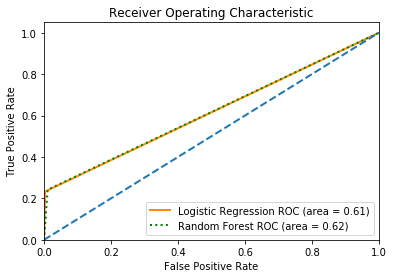

In [22]:
plt.figure()
lw = 2
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Logistic Regression ROC (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='green',
         lw=lw, linestyle=':', label='Random Forest ROC (area = %0.2f)' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()